<div class="alert alert-block alert-info">
<b>Комментарий ревьюера:</b>

Мне понравился твой проект 👍🏻 Видно, что приложено много усилий)

Перед отправкой проекта, пожалуйста, перезапусти ядро и убедись, что весь код работает (Kernel -> Restart and Run All). Важно, чтобы нумерация ячеек была правильной (начиналась с "1" и выполнялась по порядку).

Если не хочешь ждать обучения моделей, можешь сохранить лучшие гиперпараметры в отдельной переменной и закомментировать код. Необходимо также зафиксировать random_state, чтобы результат был всегда одинаковым.

Таким образом, я смогу быстрее проверить проект, и ты успеешь к дедлайну 👋🏻
</div>

Привет, Мхитар!)
<br> Меня зовут Дуолан 👋 и я рад стать твоим проводником в мире кода и данных!
<br> Вместе мы прокачаем твой проект до самого верха! 🚀
<br> Давай общаться на «ты» и поддерживать дружескую атмосферу. Если ты согласен, конечно! 😊
<br> Пожалуйста, напиши мне ответ на каждый комментарий («исправлено», «не уверен, как это сделать» и т. д.)
<br> Оставь, пожалуйста, мои комментарии на месте – они пригодятся для последующих проверок.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> Если всё просто супер!
</div>

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b> Если требуются исправления
</div>

Твой проект не может быть принят, пока есть красные комментарии.

-------------------

Пожалуйста, отмечай свои ответы и изменения таким образом:

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Вот что я изменил ...
</div>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

try:
    import sweetviz as sv
except:
    !pip install sweetviz
    import sweetviz as sv
    
    
import matplotlib.pyplot as plt
import time

plt.style.use('seaborn-whitegrid')

RANDOM_STATE = 12345

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Импорт выглядит отлично 👍
</div>

## Подготовка данных

In [2]:
try:
    df=pd.read_csv('autos.csv')
except:
    df = pd.read_csv('/datasets/autos.csv')

In [3]:
df.shape

(354369, 16)

In [4]:
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


                                             |          | [  0%]   00:00 -> (? left)


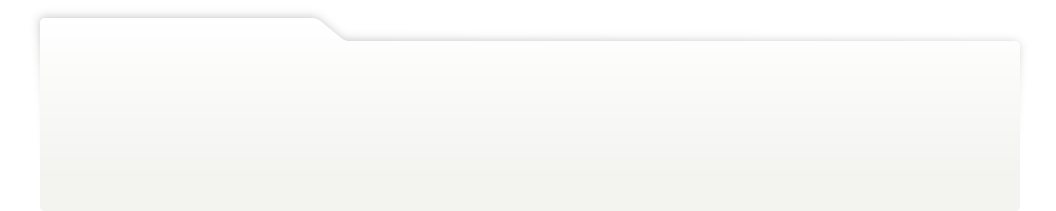
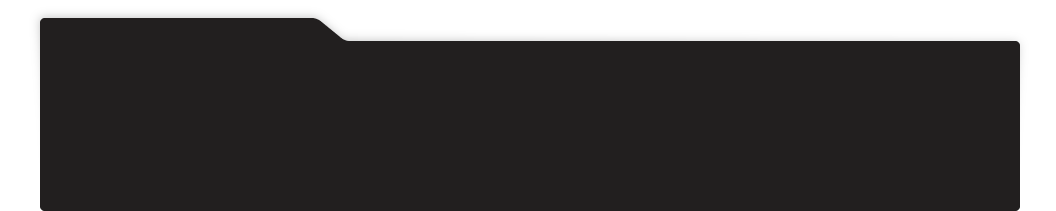
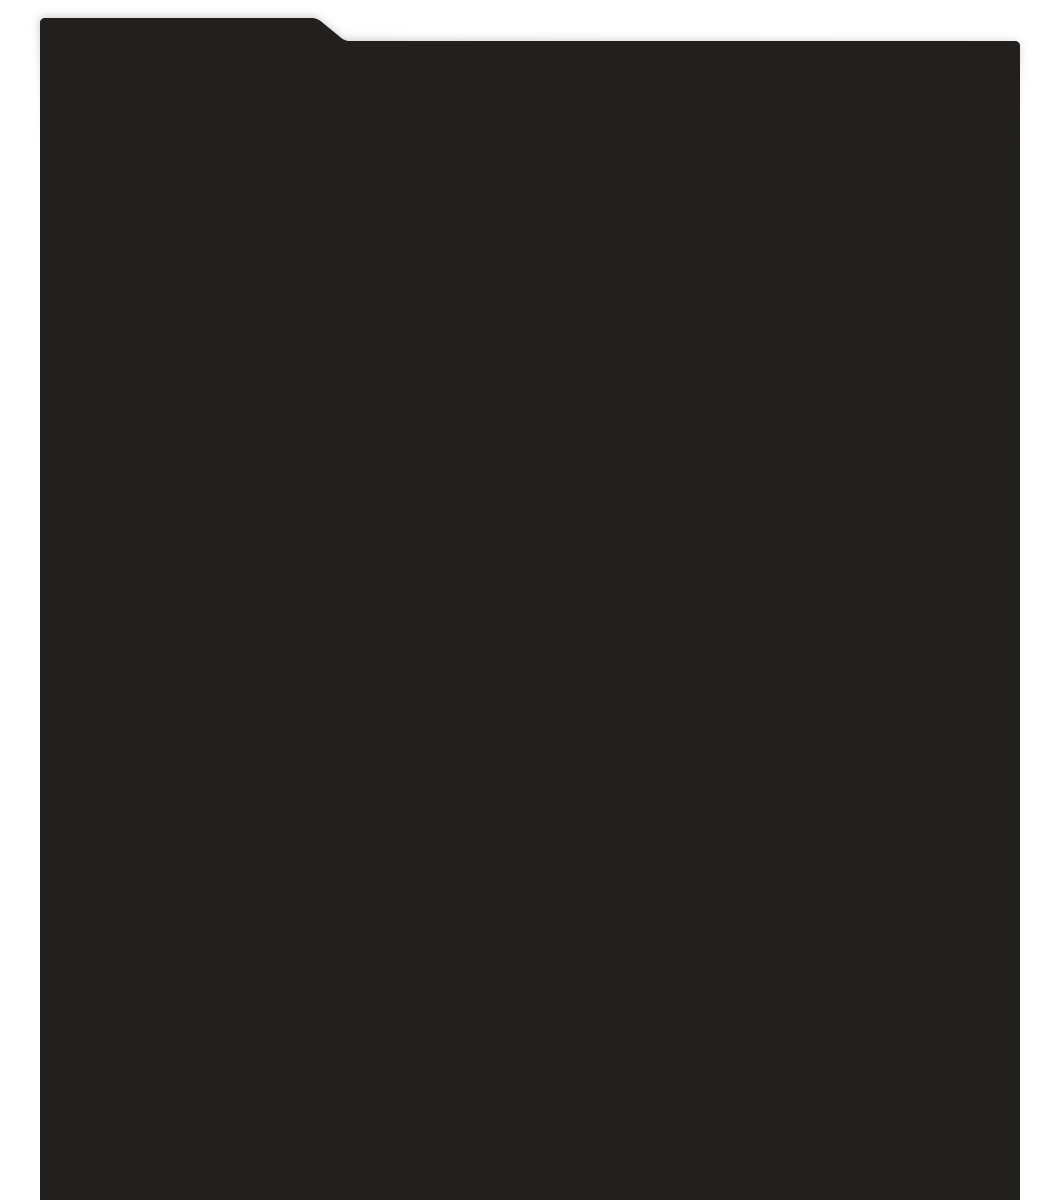
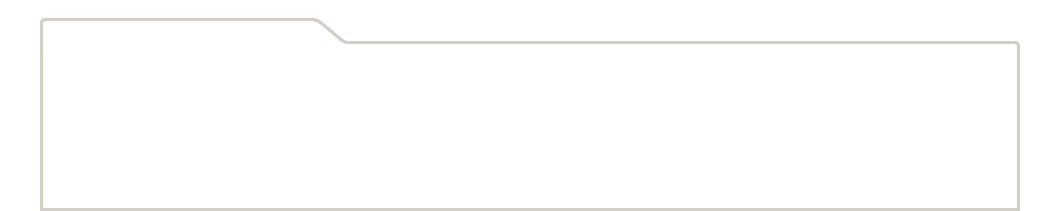
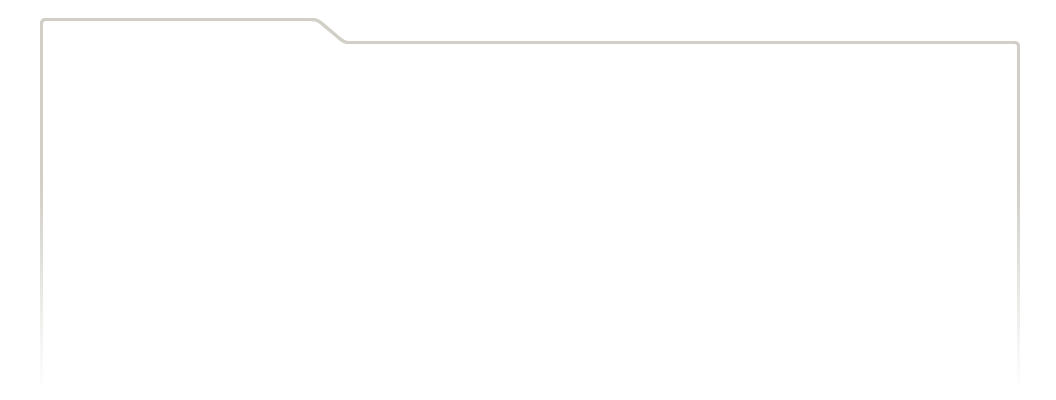
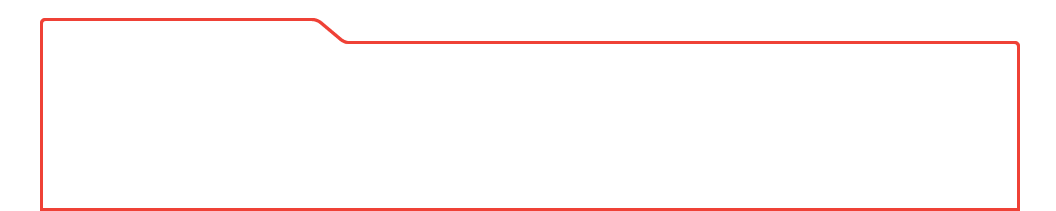
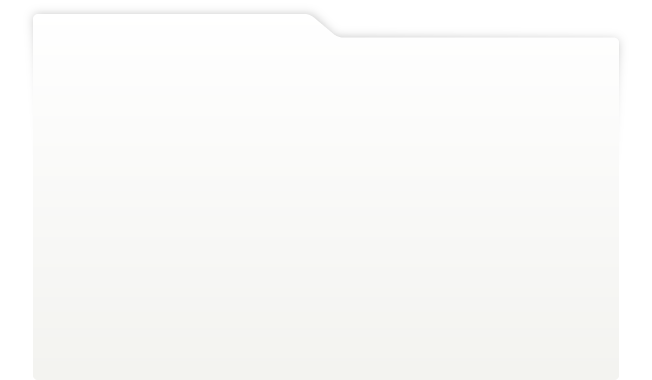
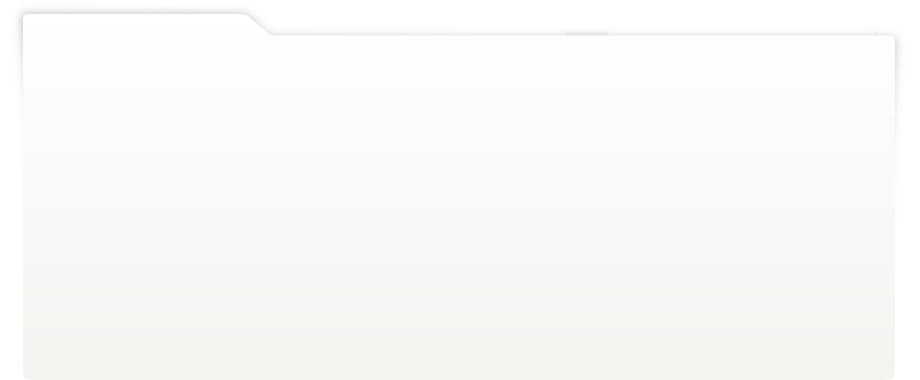
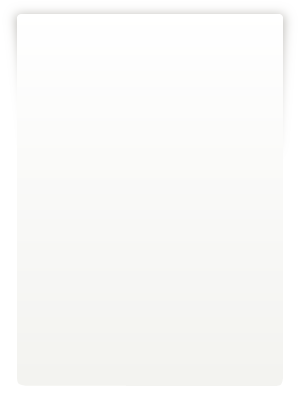
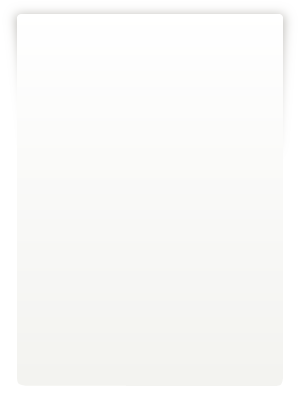
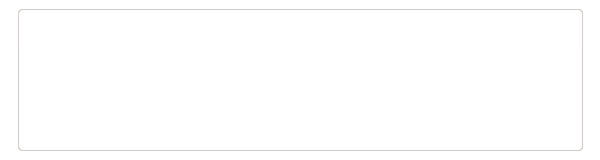
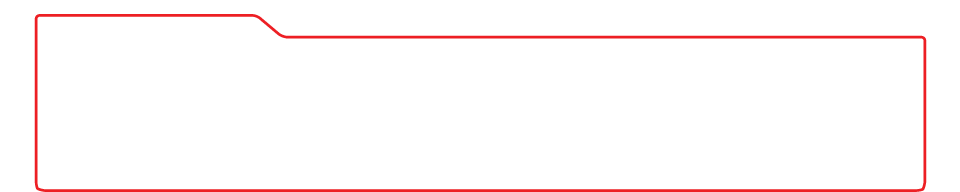
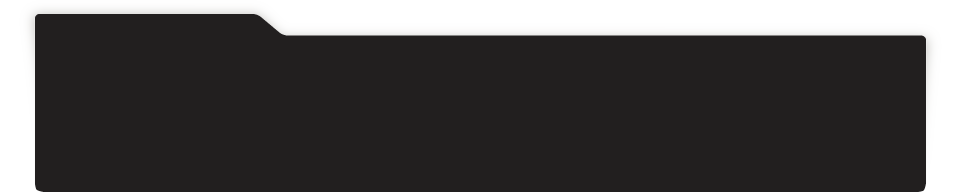
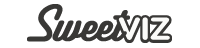
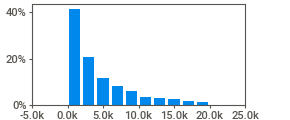
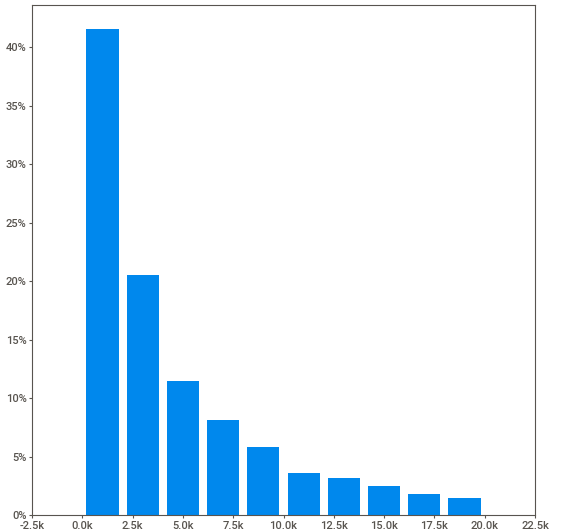
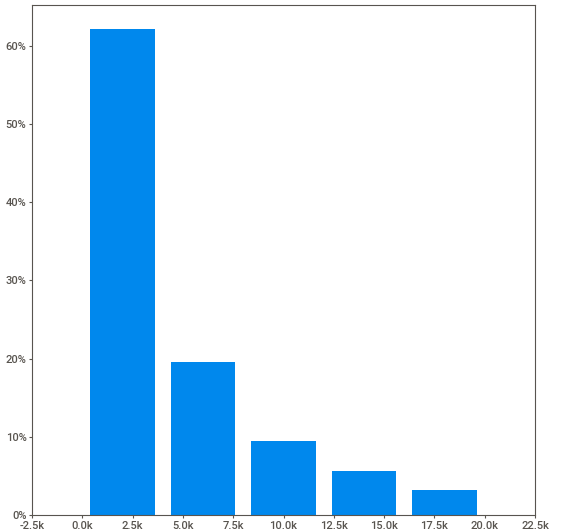
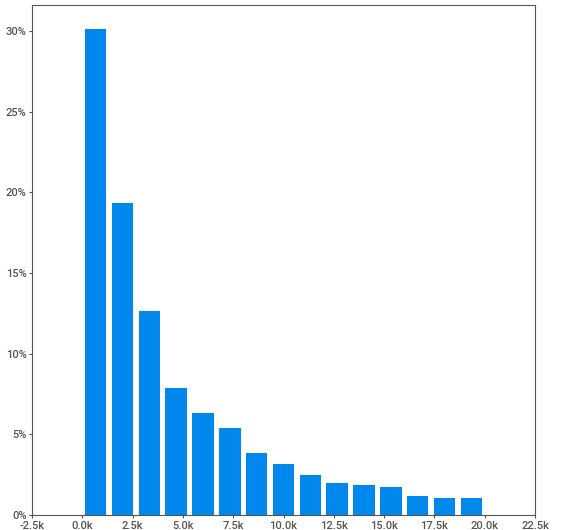
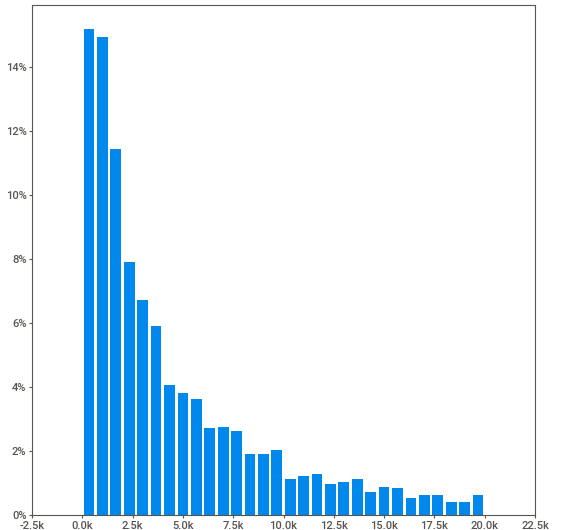
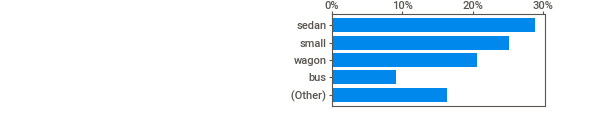
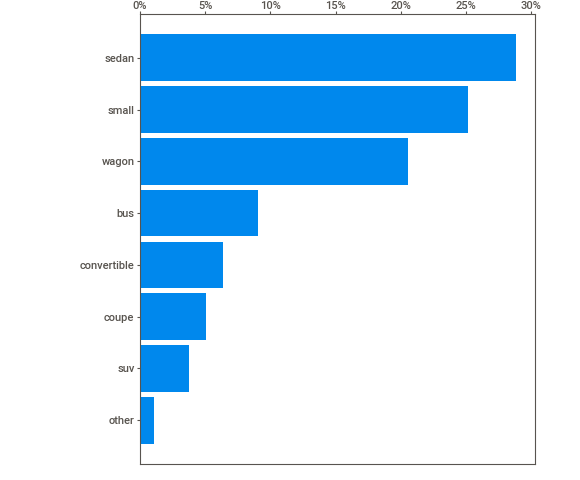
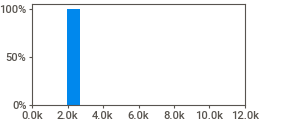
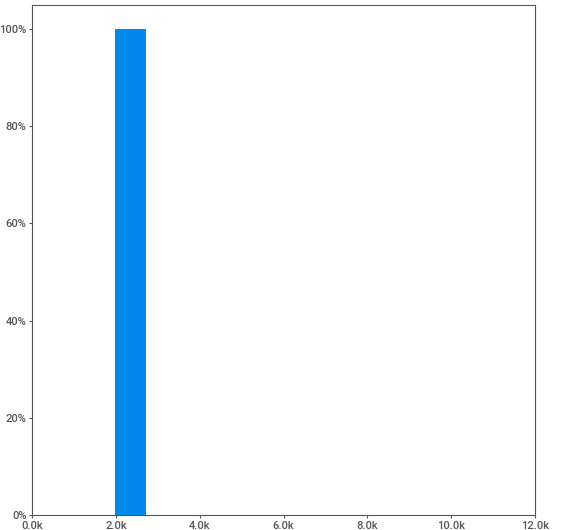
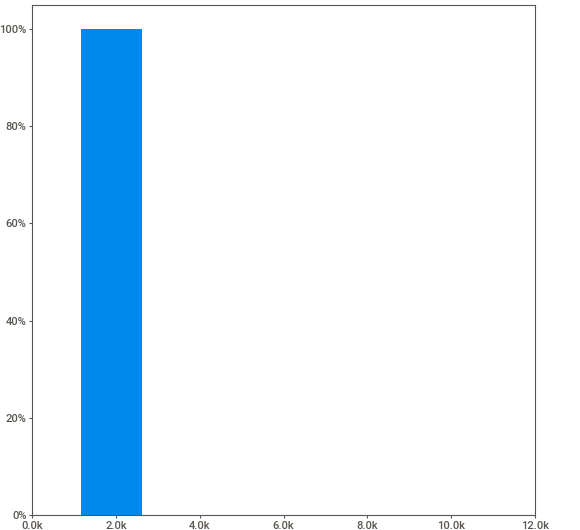
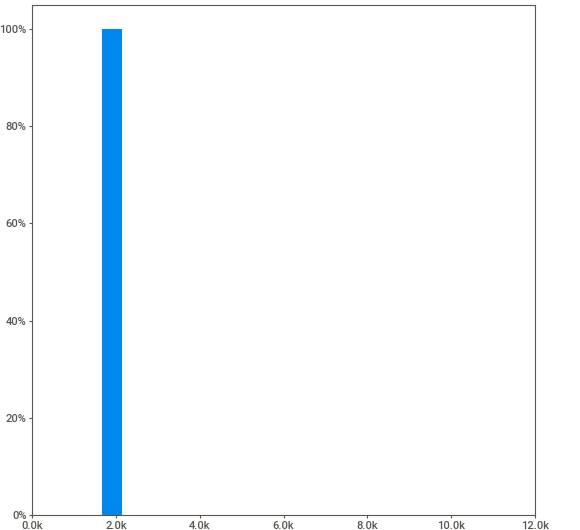
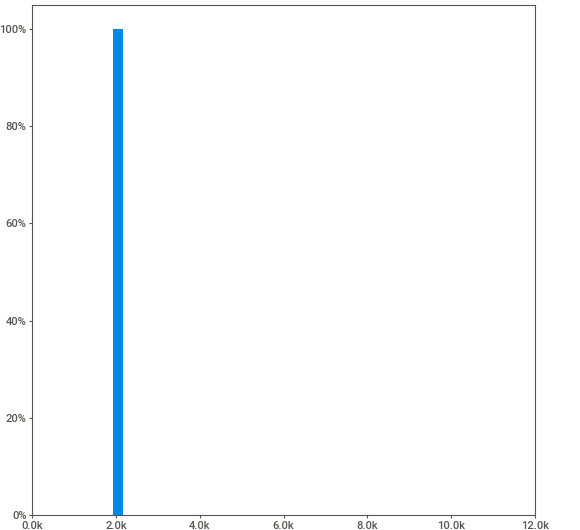
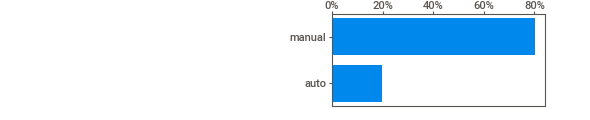
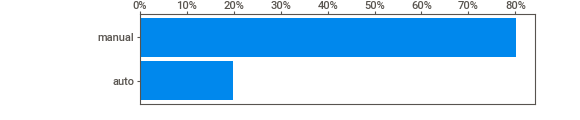
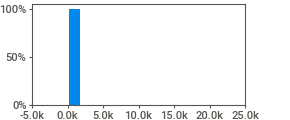
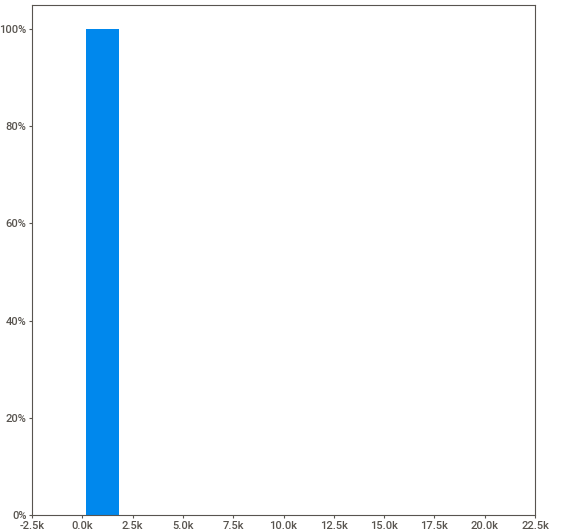
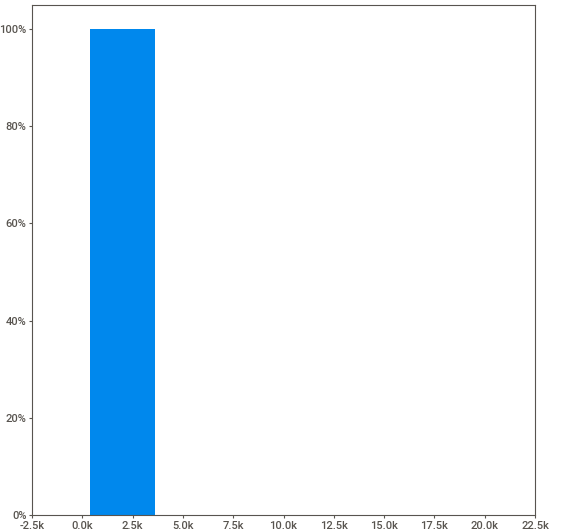
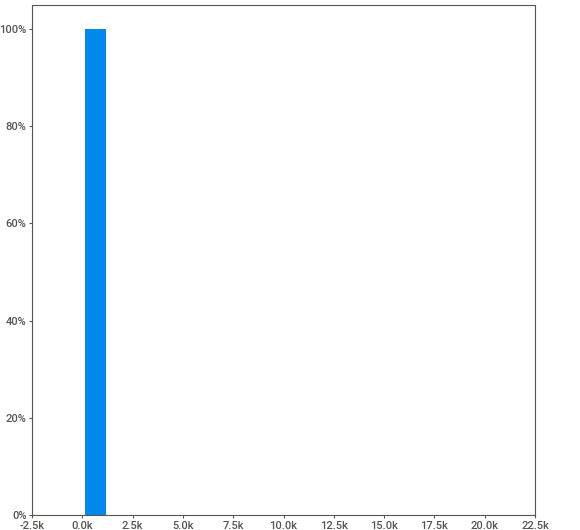
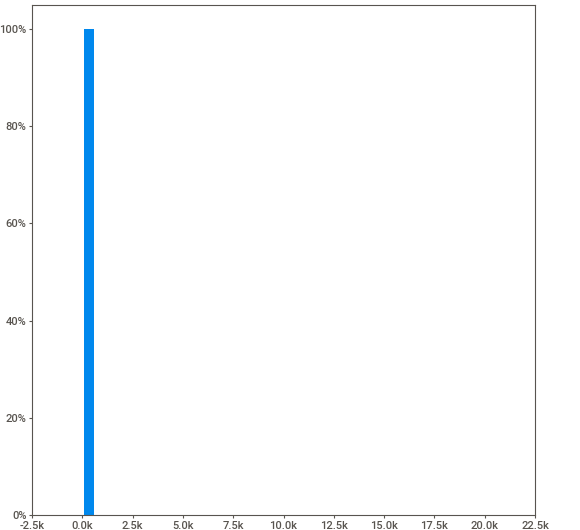
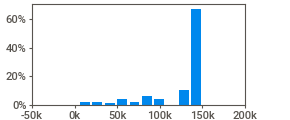
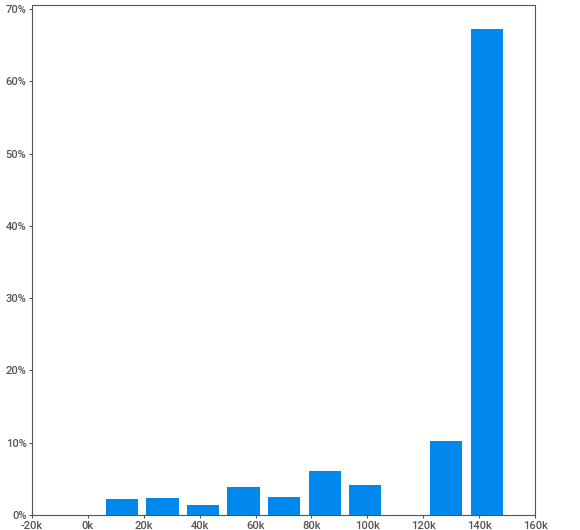
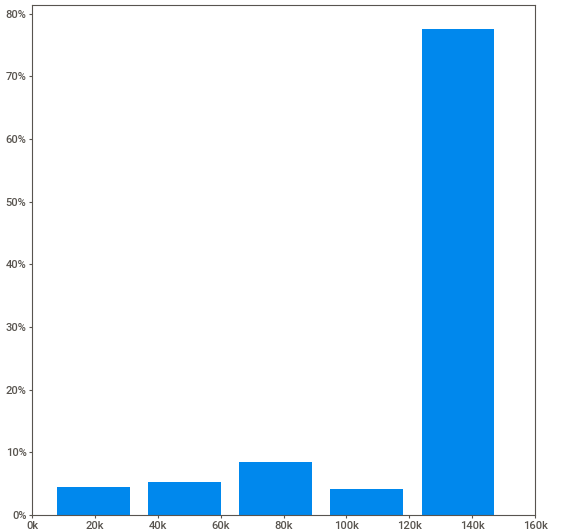
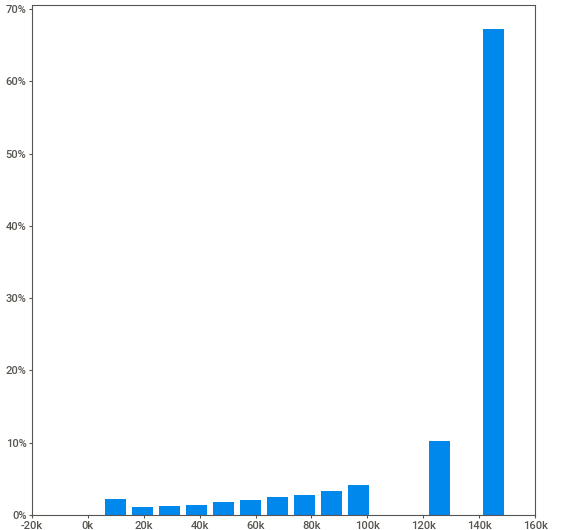
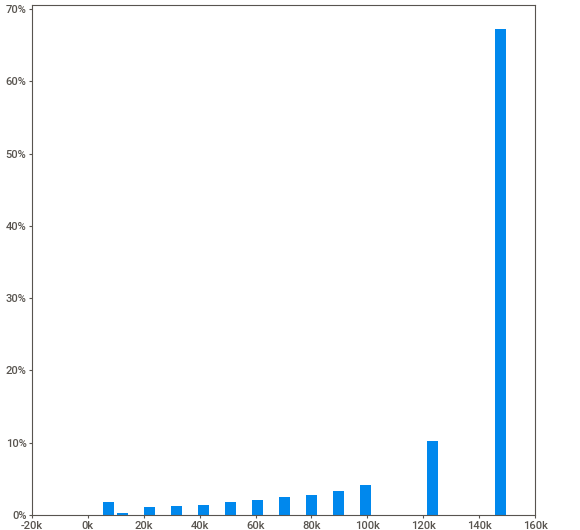
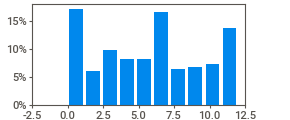
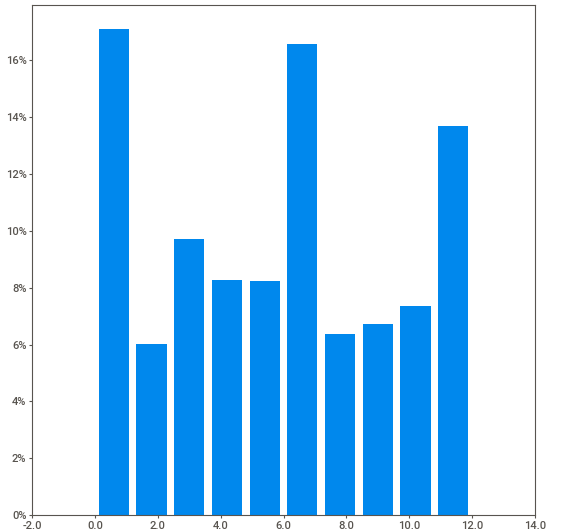
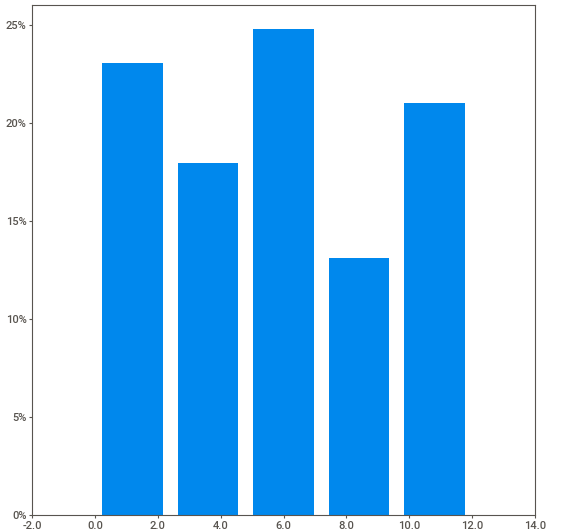
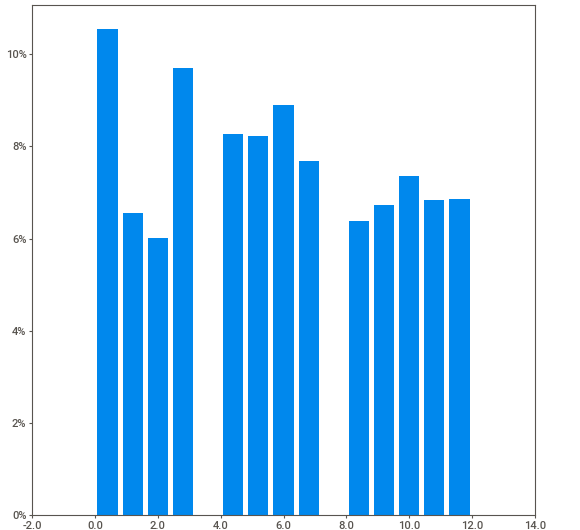
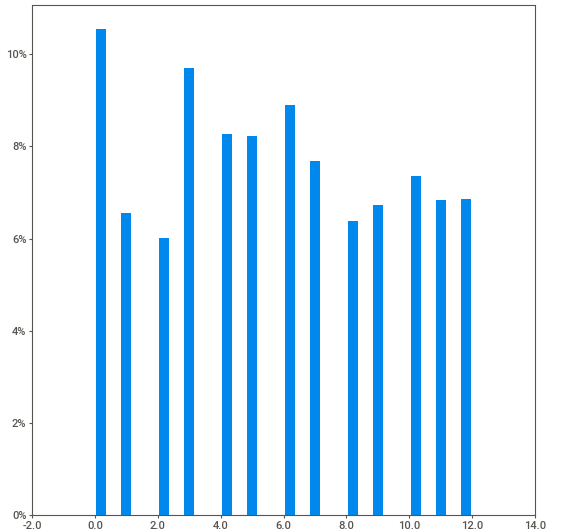
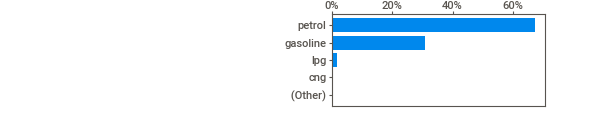
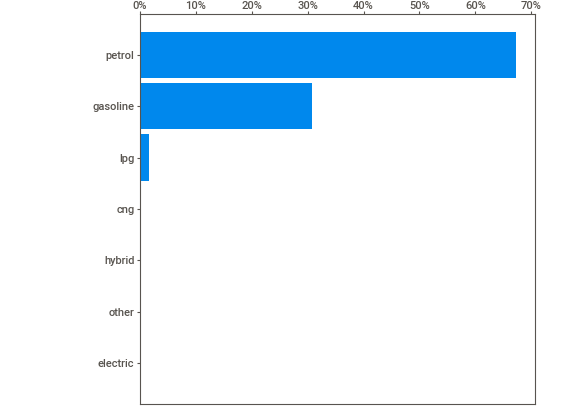
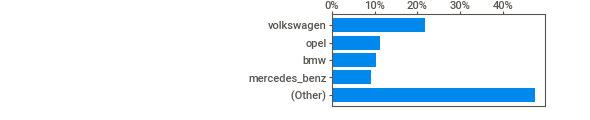
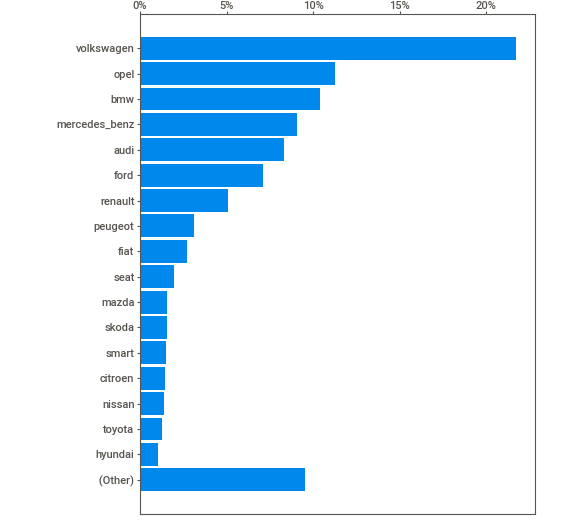
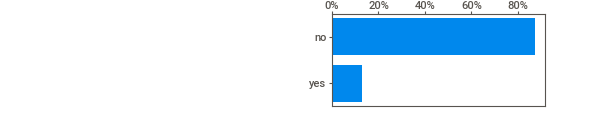
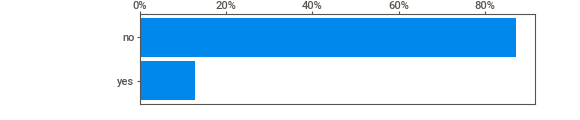
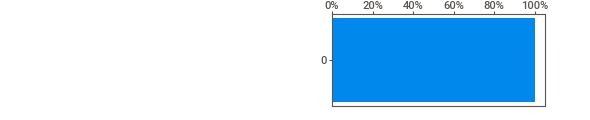
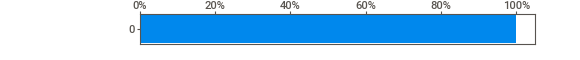
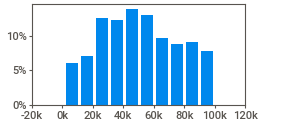
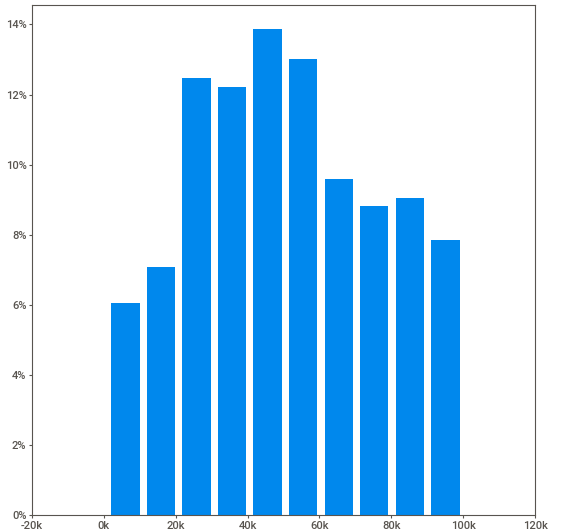
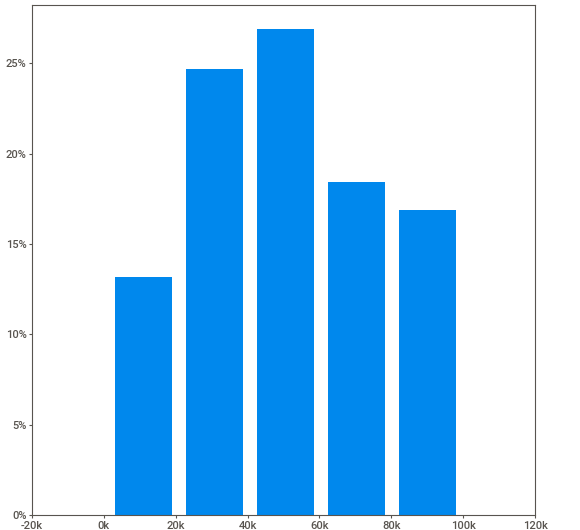
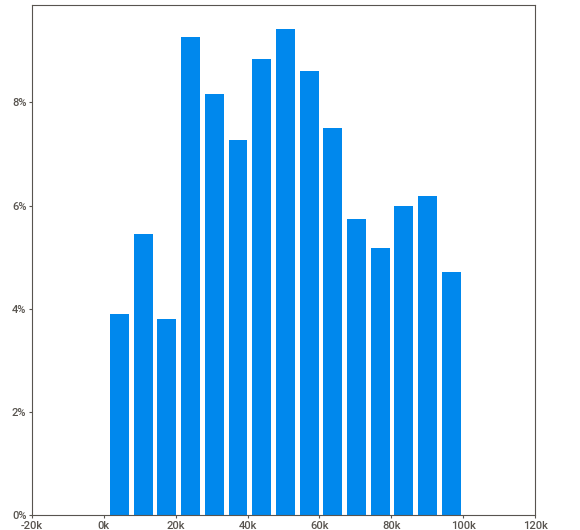
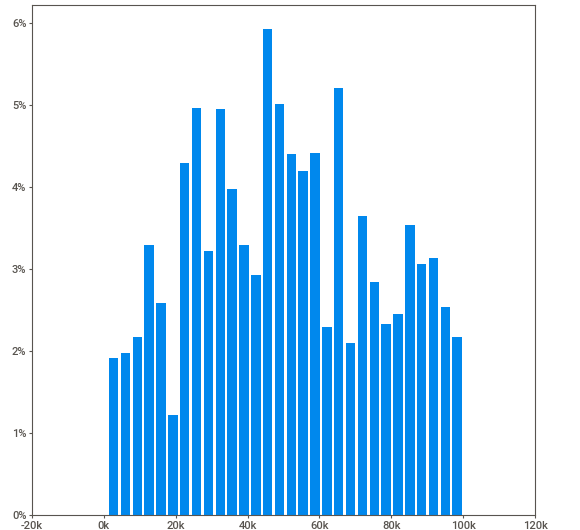
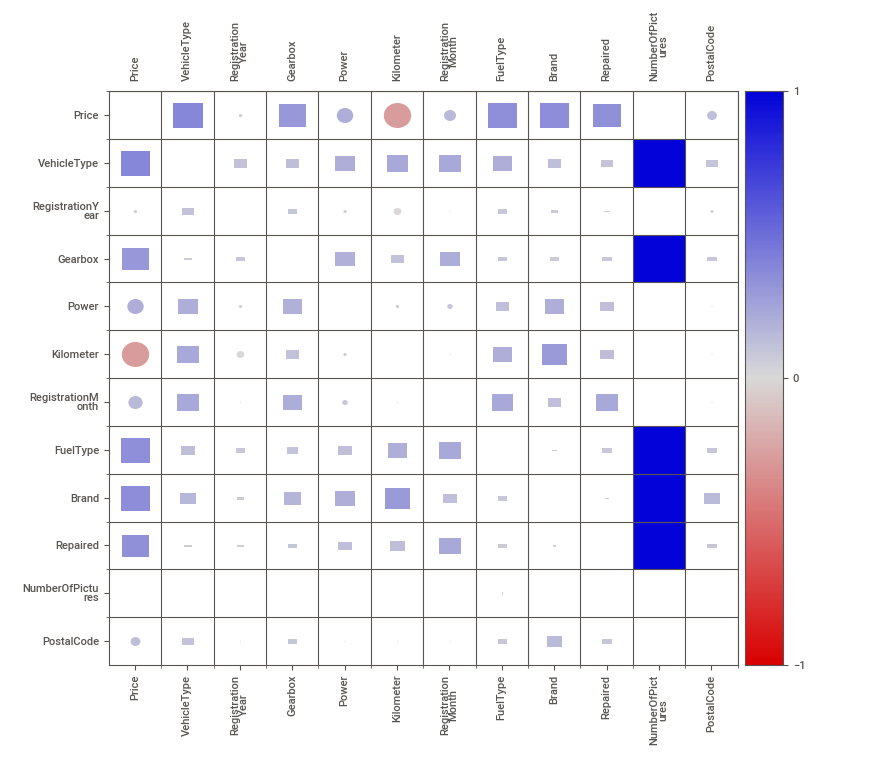
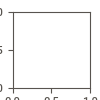

In [5]:
report = sv.analyze([df, "Report"])
report.show_notebook()

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Хороший метод первичного анализа данных 👍
</div>

In [6]:
def fix_col_name(columns):
    df_new_cols = []
    for column in columns:
        for i in column:
            if i.isupper():
                column = column.replace(i, '_' + i.lower())
        column = column[1:]
        df_new_cols.append(column)
    return(df_new_cols)

In [7]:
df.columns = fix_col_name(df.columns)
df.columns

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'kilometer', 'registration_month', 'fuel_type',
       'brand', 'repaired', 'date_created', 'number_of_pictures',
       'postal_code', 'last_seen'],
      dtype='object')

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 

Работать с такими названиями гораздо удобнее 👍🏻
</div>

In [8]:
df.isna().sum()

date_crawled              0
price                     0
vehicle_type          37490
registration_year         0
gearbox               19833
power                     0
model                 19705
kilometer                 0
registration_month        0
fuel_type             32895
brand                     0
repaired              71154
date_created              0
number_of_pictures        0
postal_code               0
last_seen                 0
dtype: int64

In [9]:
def outliers_detection(column):
    """ Функция для поиска и удаления аномальных значений, используя межквартильный диапазон. 
        Наблюдение является выбросом, если оно в 2 раза превышает межквартильный размах, превышающий Q3, 
        или в 2 раза превышает межквартильный размах, меньше Q1.
        На входе функция принимает название столбца. """
    
    Q1,Q3 = np.percentile(df[column] , [25,75])
    IQR = Q3 - Q1
    ul = Q3+2.5*IQR
    ll = Q1-2.5*IQR
    outliers = df[(df[column] > ul) | (df[column] < ll)]
    df.drop(outliers.index, inplace=True)

Используем такие границы, т.к. в противном случае удалется около 17% всего датасета.

* **Столбец price**

In [10]:
df = df[df['price'] != 0]

In [11]:
outliers_detection('price')

В признаке `цена` нет пропусков, но есть нулевые значения. Заполнить эти значения будет некорректно, т.к. `цена` - целевой признак, поэтому их удалили. Так же большое количество аномальных значений в цене, удалим их.

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

В данных остались машины только с адекватной ценой 👍
</div>

* **Столбец VehicleType**

In [12]:
df['vehicle_type'].isna().sum()

33710

In [13]:
df['vehicle_type'].fillna('unknown', inplace=True)

В признаке тип автомобильного кузова пропуски заменили значением `unknown`

In [14]:
df['vehicle_type'].unique()

array(['unknown', 'coupe', 'suv', 'small', 'sedan', 'convertible', 'bus',
       'wagon', 'other'], dtype=object)

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Согласен с таким заполнением 👍
</div>

* **Столбец registration_year**

In [15]:
df['date_crawled'].max()

'2016-04-07 14:36:58'

In [16]:
df = df[~((df['registration_year'] >= 2017) | ((df['registration_year'] == 2016) & (df['registration_month'] >= 5)) | (df['registration_year'] < 1900))]

В столбце `год регистрации автомобиля` имеются аномальные значения. Т.к. самая последняя анкета была скачана 7 апреля 2016, то удалим данные автомобилей, с датой регистрации больше это даты, т.к. это, очевидно, ошибка, и меньше 1900 года.

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Молодец, что для верхней границы `registration_year` используешь дату скачивания анкеты 👍
</div>

* **Столбец gearbox**

In [17]:
df['gearbox'].unique()

array(['manual', 'auto', nan], dtype=object)

In [18]:
df['gearbox']=df['gearbox'].fillna(df.groupby('model', dropna=False)['gearbox'].transform(lambda x:x.mode().iat[0]))

Пропуски в столбце `gearbox` заменил на наиболее встречающийся тип коробки передач у данной модели автомобиля. Оставшиеся пропуски, у которых неизвестен ни тип к.п. ни модель машины удалил.

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Согласен с таким заполнением 👍
</div>

* **Столбец power**

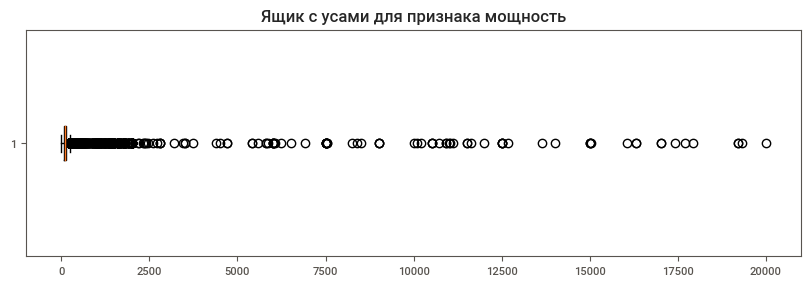

In [19]:
plt.figure(figsize=(10,3))
plt.boxplot(df['power'], vert=0)
plt.title('Ящик с усами для признака мощность')
plt.show()

In [20]:
outliers_detection('power')

In [21]:
df.loc[df['power'] == 0, 'power'] = df.groupby('model')['power'].transform('median')

In [22]:
df.dropna(subset=['power'], inplace=True)

В признаке мощность удалил аномалии, используя межквартильный размах, а 0 заменил на медианное значение по модели авто.

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Мощность ограничили 👍
</div>

* **Столбец model**

In [23]:
df['model'].isna().sum()

10591

In [24]:
df['model'].fillna('unknown', inplace=True)

В признаке модель автомобиля пропуски заменили значением unknown

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Согласен с таким заполнением 👍
</div>

* **Столбец fueltype**

In [25]:
df['fuel_type'].unique()

array(['petrol', 'gasoline', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electric'], dtype=object)

In [26]:
df['fuel_type']=df['fuel_type'].fillna(df.groupby('model')['fuel_type'].transform(lambda x:x.mode().iat[0]))

Пропуски в столбце fuel_type заменил на наиболее встречающийся тип топлива у данной модели автомобиля.

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Согласен с таким заполнением 👍
</div>

* **Столбец repaired**

In [27]:
df['repaired'].fillna('yes', inplace=True)

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Согласен с таким заполнением 👍
</div>

В столбце repaired заменили пропуски на yes, т.к. поддержанные автомобили с высокой долей вероятности были хоть один раз в ремонте.

In [28]:
df.drop_duplicates(inplace=True)
df.drop(['date_crawled', 'registration_month', 'date_created', 'number_of_pictures', 'postal_code', 'last_seen'],axis=1, inplace=True)

**Вывод**: Избавились от пропусков и удалили дубликаты и неинформативные признаки. Размер исходных данных уменьшился на 10%, что вполне приемлемо.

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Удалить неинформативные признаки - хорошее решение 👍
</div>

## Обучение моделей

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
features = df.drop('price', axis=1)
target = df['price']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=RANDOM_STATE, shuffle=True)
print(features_train.shape)
print(features_test.shape)

(238205, 9)
(79402, 9)


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 

Данные поделены верно, пропорции выбраны адекватные 👍
</div>

In [31]:
num = ['registration_year', 'power', 'kilometer']
cat = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'repaired']

preprocessor_ohe = ColumnTransformer([
    ('nums', StandardScaler(), num),
    ('one_hot', OneHotEncoder(sparse=False, handle_unknown='ignore'), cat)], 
                                remainder='passthrough')
preprocessor_ordinal = ColumnTransformer([
    ('nums', StandardScaler(), num),
    ('one_hot', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value = 999), cat)], 
                                remainder='passthrough')

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 

Молодец, что для различных моделей используешь различные методы кодирования 👍
</div>

### Linear Regression

In [32]:
start_time = time.time()

model_lr = Pipeline(steps =[
    ('preprocessor', preprocessor_ohe),
    ('model', LinearRegression())])

model_lr.fit(features_train, target_train)

lr_fit_time = time.time()-start_time

In [33]:
start_time = time.time()

target_pred = model_lr.predict(features_train)
lr_rmse = mean_squared_error(target_train, target_pred, squared=False)

lr_predict_time = time.time()-start_time

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 

Модель обучена корректно 👍
</div>

### Random Forest

Далее ячейки закоментил, т.к. расчет занимает долгое время.

In [34]:
# model_rf = Pipeline(steps =[
#     ('preprocessor', preprocessor_ordinal),
#     ('rf', RandomForestRegressor()),
# ])

# parameters = {'rf__n_estimators': [1,2,4,8,16,32,64,128],
#               'rf__max_depth': range(2,22, 2)}
# rf_grid = RandomizedSearchCV(model_rf, parameters, scoring='neg_root_mean_squared_error').fit(features_train, target_train)
# rf_rmse = print(rf_grid.best_score_))
# print("Лучшая модель")
# print(rf_grid.best_estimator_)

In [35]:
start_time = time.time()

model_rf = Pipeline(steps =[
    ('preprocessor', preprocessor_ordinal),
    ('model', RandomForestRegressor(max_depth=18, n_estimators=8, random_state=RANDOM_STATE)),
])

model_rf.fit(features_train, target_train)

rf_fit_time = time.time()-start_time

In [36]:
start_time = time.time()

pred_rf = model_rf.predict(features_train)
rf_rmse = mean_squared_error(target_train, pred_rf, squared=False)

rf_predict_time = time.time()-start_time

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 

Модель обучена корректно 👍
</div>

### XGBooost

In [37]:
# model_xgb = Pipeline(steps =[
#     ('preprocessor', preprocessor_ordinal),
#     ('xgb', XGBRegressor()),
# ])

# parameters = {'xgb__max_depth': range (2, 10, 2),
#               'xgb__n_estimators': range(60, 220, 40),
#               'xgb__learning_rate': [0.1, 0.01, 0.05]}

# xgb_grid = RandomizedSearchCV(model_xgb, parameters, scoring='neg_root_mean_squared_error').fit(features_train, target_train)
# xgb_rmse = print(xgb_grid.best_score_))
# print("Лучшая модель")
# print(xgb_grid.best_estimator_)

In [38]:
start_time = time.time()

model_xgb = Pipeline(steps =[
    ('preprocessor', preprocessor_ordinal),
    ('model', XGBRegressor(max_depth=8, n_estimators=180, learning_rate=0.05, random_state=RANDOM_STATE)),
])

model_xgb.fit(features_train, target_train)

xgb_fit_time = time.time()-start_time

In [39]:
start_time = time.time()

pred_xgb = model_xgb.predict(features_train)
xgb_rmse = mean_squared_error(target_train, pred_xgb, squared=False)

xgb_predict_time = time.time()-start_time

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 

Модель обучена корректно 👍
</div>

### LightGBM

In [40]:
features_train[cat] = features_train[cat].astype('category')
features_test[cat] = features_test[cat].astype('category')

In [41]:
# model_lgbm = LGBMRegressor()

# parameters = {'max_depth': range (2, 10, 2),
#               'learning_rate': [0.1, 0.5, 0.8]}

# lgbm_grid = RandomizedSearchCV(model_lgbm, parameters, scoring='neg_root_mean_squared_error').fit(features_train, target_train)
# lgbm_rmse = print(lgbm_grid.best_score_))
# print("Лучшая модель")
# print(lgbm_grid.best_estimator_)

In [42]:
start_time = time.time()

model_lgbm = LGBMRegressor(max_depth=8, learning_rate=0.5, random_state=RANDOM_STATE)

model_lgbm.fit(features_train, target_train, categorical_feature=cat)

lgbm_fit_time = time.time()-start_time

In [43]:
start_time = time.time()

pred_lgbm = model_lgbm.predict(features_train)
lgbm_rmse = mean_squared_error(target_train, pred_lgbm, squared=False)

lgbm_predict_time = time.time()-start_time

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 

Модель обучена корректно 👍
</div>

## Анализ моделей

In [44]:
result = {}
for i, k in zip(['Linear Regression', 'Random Forest', 'XGBoost', 'LightGBM'], ['lr', 'rf', 'xgb', 'lgbm']):
    result[i] = [vars()[k + '_rmse'], vars()[k + '_fit_time'], vars()[k + '_predict_time']]

result_table = pd.DataFrame(result, index =  ['RMSE', 'Время обучения, сек', 'Время предсказания, сек'])
result_table.style.set_properties(**{'background-color': '#e6ffe6'}, subset=['Random Forest']) 

,Linear Regression,Random Forest,XGBoost,LightGBM
RMSE,2569.875038,1132.091206,1483.084292,1473.992344
"Время обучения, сек",23.923538,4.281304,134.416519,7.661703
"Время предсказания, сек",1.600122,0.737448,2.252189,1.604408


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Молодец, что для сравнения моделей заносишь их в общий датафрейм 👍
</div>

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>
    
Анализ моделей не должен включать тестовую выборку. Тестовая выборка используется в самом конце - в финальном тестировании лучшей модели. Выбирать лучшую модель, основываясь на результатах на тестовой выборке кажется неверным, так как это может привести к переобучению.

Если валидационной выборки нет, то анализ моделей должен выглядеть так:

1. RMSE вычисляется с помощью кросс-валидации на тренировочной выборке (grid.best_score_ или cross_val_score)
2. Время обучения = время model.fit(X_train, y_train)
3. Время предсказания = время model.predict(X_train)
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Провел анализ моделей, определил, что наиболее оптимальной является Random Forest.
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Вот что я изменил <br>
    1) model.predict(features_<b>test</b>) на model.predict(features_<b>train</b>) <br>
    2) mean_squared_error(target_<b>test</b>, pred, squared=False) на mean_squared_error(target_<b>train</b>, pred, squared=False)
</div>

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b>

Из того же GridSearchCV мы можем получить время обучения и время предсказания)

В атрибуте `cv_results_` есть среднее время обучения и среднее время предсказания для всех комбинаций.
</div>

## Тестирование лучшей модели

In [45]:
pred_rf_best = model_rf.predict(features_test)
rf_rmse_best = mean_squared_error(target_test, pred_rf_best, squared=False)
print(f'RMSE лучшей модели на тестовой выборке: {rf_rmse_best:.2f}')

RMSE лучшей модели на тестовой выборке: 1639.97


<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

После анализа моделей нужно порекомендовать заказчику одну модель на основе его критериев и провести на ней финальное тестирование.
    
Лучше в обучении и анализе не использовать тестовую выборку. Выбирать лучшую модель, основываясь на результатах на тестовой выборке кажется неверным, так как это может привести к переобучению.
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

<div class="alert alert-block alert-info">
<b>Комментарий ревьюера:</b>

Для того, чтобы все было понятно, напишу конкретный план (структуру) обучения и анализа моделей:

1. Обучение моделей. При обучении необходимо рассмотреть хотя бы одну простую модель и один метод бустинга. Подбор гиперпараметров должен быть проведен как минимум для одной модели. Существует два варианта:

    - Без использования валидационной выборки. В этом случае гиперпараметры следует подбирать с помощью кросс-валидации (GridSearchCV, RandomizedSearchCV) или вручную (cross_val_score).
    - С использованием валидационной выборки. В этом случае можно не использовать кросс-валидацию и подбирать гиперпараметры вручную.

2. Анализ моделей. После нахождения наилучших гиперпараметров необходимо измерить время обучения, время предсказания и RMSE. Существует два варианта:

    - Без использования валидационной выборки. RMSE следует рассчитать на кросс-валидации. Время обучения можно рассчитать как время выполнения метода model.fit(X_train), а время предсказания - как время выполнения метода model.predict(X_train).
    - С использованием валидационной выборки. RMSE следует рассчитать на валидационной выборке. Время обучения можно рассчитать как время выполнения метода model.fit(X_train), а время предсказания - как время выполнения метода model.predict(X_valid).

После этого необходимо сделать выводы по анализу моделей (результаты можно занести в общую таблицу) и посоветовать заказчику наиболее подходящую модель на основе его критериев.

3. Тестирование. Необходимо рассчитать финальную метрику лучшей модели на тестовой выборке (при этом тестовая выборка не должна использоваться на предыдущих этапах!). RMSE должно быть не больше 2500. Если метрика не удовлетворяет требованиям, можно попробовать внести коррективы в модель (на этапе обучения, а не на тестовой выборке!).

</div>

## Вывод

1. В ходе работы мной были исследованы и подготовлены данные: проверены дубликаты, пропуски, изучены распределения исходных признаков, удалены неинформативные признаки и аномалии.
2. Данные были разделены на обучающую и тестовую выборки. Для предсказания цены автомобиля был создан пайплайн, в котором я объединил операцию предварительной обработки (масштабирования данных и кодирование категориальных признаков) с моделью машинного обучения (линейная регрессия,случайный лес), так же были обучены модели градиентного бустинга ( XGBoost, CatBoost, LightGBM) c предварительным подбором гиперпараметров.
3. В результате было определено, что дольше всего учится модель XGboost. Модель Random Forest имеет относительно низкую скорость обучения и предсказания (в пределах 7 сек.) и при этом самую низкую RMSE из всех моделей. Протестировав лучшую модель (Random Forest) на тестовой выборке результат было получено, что RMSE = 1627.27.

**Исходя из требований заказчика по скорости обучения, предсказания и качества модели, рекомендуем модель Random Forest, поскольку она имеет самые оптимальные характеристики.**

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Вывод соответствует исследованию 👍
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Обновил вывод.
</div>

# <font color='orange'>Общее впечатление</font>
* Этот проект выполнен очень хорошо
* Видно, что приложено много усилий
* Молодец, что структурируешь ноутбук, приятно проверять такие работы
* У тебя чистый и лаконичный код
* Мне было интересно читать твои промежуточные выводы
* Твой уровень подачи материала находится на высоком уровне
* Исправь, пожалуйста, мои замечания. Затем отправляй на повторную проверку
* Жду новую версию проекта 👋

# <font color='orange'>2. Общее впечатление</font>
* Спасибо за быстрое внесение правок
* Теперь проект выглядит лучше )
* Критических замечаний нет
* Молодец, отличная работа!
* Надеюсь, ревью было полезным
* Удачи в дальнейшем обучении 👋

# <font color='orange'>Рекомендации 🔥</font>
* Доступное объяснение про работу градиентного бустинга <a href='https://www.youtube.com/watch?v=ZNJ3lKyI-EY&t=995s'>ссылка</a>
* После просмотра видео можешь почитать статью про ансамбли и бустинги <a href='https://habr.com/ru/company/ods/blog/645887/'>ссылка</a>
* Статья на Хабре представляет краткое введение в алгоритмы бустинга и описывает их принципы работы <a href='https://habr.com/ru/company/ods/blog/327250/'>ссылка</a>
* Подбор гиперпараметров для CatBoost <a href='https://habr.com/ru/company/otus/blog/527554/'>ссылка</a>
* Подбор гиперпараметров для LightGBM <a href='https://programmersought.com/article/40776531516/'>ссылка</a>
* Разумные способы кодирования категориальных данных для машинного обучения <a href='https://machinelearningmastery.ru/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159/'>ссылка</a>
* Статья про "непонятную" метрику ROC-AUC <a href='https://dyakonov.org/2017/07/28/auc-roc-площадь-под-кривой-ошибок/'>ссылка</a>
* Хочешь подтянуть математику для DS?) <a href='https://academy.stepik.org/math-for-data-science'>ссылка</a>
* Также есть курс по математике от ЯП <a href='https://practicum.yandex.ru/math-for-da-ds/'>ссылка</a>
* В нашем деле нужно быть всегда в курсе всех новинок, новостей и тд, вот тут публикуют новости в области DS <a href='https://www.infoq.com/data-analysis/news/'>ссылка</a>
* Всем аналитикам данных рекомендую книгу Даниела Канемана "Думай медленно, решай быстро"